Results for Logistic Regression:
Accuracy: 0.9451
Precision: 0.9477
Recall: 0.9968
F1 Score: 0.9716
ROC AUC: 0.9638


Results for Random Forest:
Accuracy: 0.9440
Precision: 0.9440
Recall: 1.0000
F1 Score: 0.9712
ROC AUC: 0.9490


Results for Naive Bayes:
Accuracy: 0.9430
Precision: 0.9430
Recall: 1.0000
F1 Score: 0.9707
ROC AUC: 0.8603


Results for Decision Tree:
Accuracy: 0.9390
Precision: 0.9738
Recall: 0.9612
F1 Score: 0.9674
ROC AUC: 0.7663


Results for SVM:
Accuracy: 0.9491
Precision: 0.9507
Recall: 0.9978
F1 Score: 0.9737
ROC AUC: 0.9597


Results for K-Nearest Neighbors:
Accuracy: 0.9471
Precision: 0.9515
Recall: 0.9946
F1 Score: 0.9726
ROC AUC: 0.8338




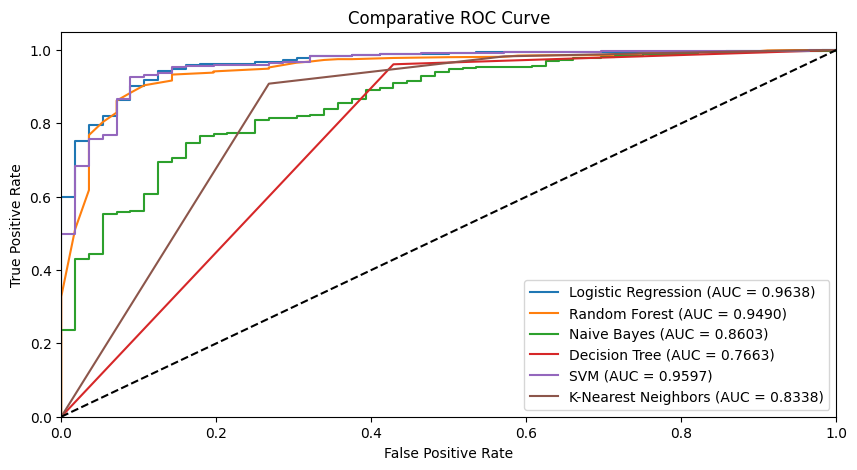

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# train-test split
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity

dfSimpleBinary = pd.read_csv('amazon_reviews_simpleBinary.csv')
X = tfidf.fit_transform(dfSimpleBinary['reviewText'])

# y = Etiqueta
y = dfSimpleBinary['overall']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np

# Apply TF-IDF on the binary dataset
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(dfSimpleBinary['reviewText'])

# y = Binary labels
y = dfSimpleBinary['overall']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Dictionary to store results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }

# Print results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    for metric, value in metrics.items():
        if isinstance(value, np.ndarray):
            continue
        print(f"{metric}: {value:.4f}")
    print("\n")

# Plot ROC curve comparison
plt.figure(figsize=(10, 5))
for model_name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f'{model_name} (AUC = {metrics["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative ROC Curve')
plt.legend(loc="lower right")
plt.show()

Resultados para Logistic Regression:
Accuracy: 0.9288
Precision: 0.9294
Recall: 0.9978
F1 Score: 0.9624
ROC AUC: 0.9377


Resultados para Random Forest:
Accuracy: 0.9227
Precision: 0.9236
Recall: 0.9978
F1 Score: 0.9593
ROC AUC: 0.9371




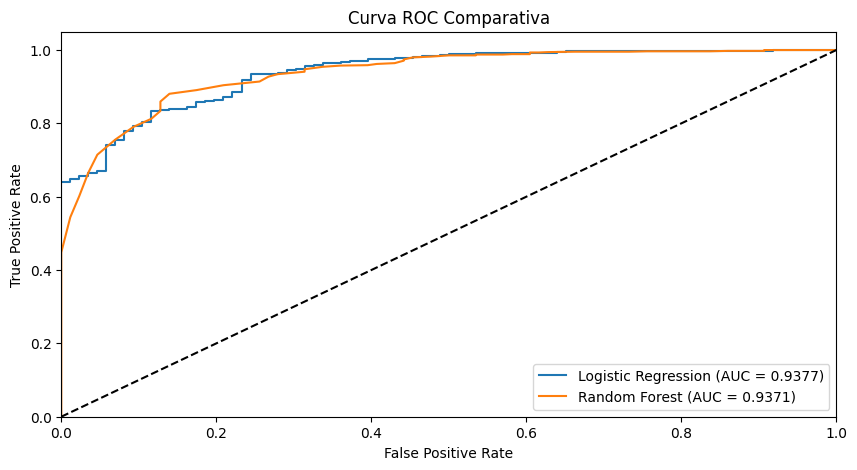

In [3]:
# CREAR NUEVO DATASET BINARIO CON THRESHOLD = 3 y aplicar los modelos implementados hasta ahora para ver si mejora
dfCleaned = pd.read_csv('amazon_reviews_cleaned.csv')
dfSimpleBinary_threshold3 = dfCleaned.copy()
dfSimpleBinary_threshold3['overall'] = dfSimpleBinary_threshold3['overall'].apply(lambda x: 1 if x > 3 else 0)
dfSimpleBinary_threshold3['overall'].value_counts()
dfSimpleBinary_threshold3.head(100)
tfidf = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for simplicity
X_threshold3 = tfidf.fit_transform(dfSimpleBinary['reviewText'])

# y = Etiqueta
y_threshold3 = dfSimpleBinary_threshold3['overall']
X_train_threshold3, X_test_threshold3, y_train_threshold3, y_test_threshold3 = train_test_split(X_threshold3, y_threshold3, test_size=0.2, random_state=42)

# Entrenar modelos para threshold = 3
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Diccionario para almacenar los resultados
results = {}

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_threshold3, y_train_threshold3)
    # Predecir en el conjunto de prueba
    y_pred_threshold3 = model.predict(X_test_threshold3)
    y_pred_prob_threshold3 = model.predict_proba(X_test_threshold3)[:, 1]
    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test_threshold3, y_pred_threshold3)
    precision = precision_score(y_test_threshold3, y_pred_threshold3)
    recall = recall_score(y_test_threshold3, y_pred_threshold3)
    f1 = f1_score(y_test_threshold3, y_pred_threshold3)
    fpr, tpr, _ = roc_curve(y_test_threshold3, y_pred_prob_threshold3)
    roc_auc = auc(fpr, tpr)
    # Guardar los resultados
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }

# Imprimir los resultados
for model_name, metrics in results.items():
    print(f"Resultados para {model_name}:")
    for metric, value in metrics.items():
        if isinstance(value, np.ndarray):
            continue
        print(f"{metric}: {value:.4f}")
    print("\n")

# Crear el gráfico comparativo de la curva ROC
plt.figure(figsize=(10, 5))
for model_name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f'{model_name} (AUC = {metrics["ROC AUC"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Comparativa')
plt.legend(loc="lower right")
plt.show()